In [6]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.autograd as autograd

import gym
import gym_minipacman

from tqdm import tqdm # for progress bar

from common.actor_critic import  OnPolicy, ActorCritic, RolloutStorage
from common.utils import *

from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

import time 

def displayImage(image, step, reward):
    clear_output(True)
    s = "step: " + str(step) + " reward: " + str(reward)
    plt.figure(figsize=(10,3))
    plt.title(s)
    plt.imshow(image)
    plt.show()
    time.sleep(0.1)

In [9]:
mode = 'regular'
env_id = '{}MiniPacmanNoFrameskip-v0'.format(mode.capitalize())

env = gym.make(env_id)

actor_critic = ActorCritic(env.observation_space.shape, env.action_space.n)
if USE_CUDA:
    actor_critic = actor_critic.cuda()
    
model_path = './trained_models/a2c_final_0bbf458fbb9a2204ab63eb3af4640a11_20210107-05.07.10'
actor_critic.load_state_dict(torch.load(model_path))

<All keys matched successfully>

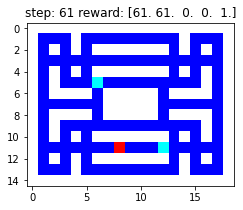

In [12]:
done = False
state = env.reset()
total_reward = 0
step   = 1


while not done:
    current_state =FloatTensor(state).unsqueeze(0)
    if USE_CUDA:
        current_state = current_state.cuda()
        
    action = actor_critic.act(current_state)
    
    next_state, reward, done, _ = env.step(action.data[0, 0])
    total_reward += reward
    state = next_state
    
    image = FloatTensor(state).permute(1, 2, 0).cpu().numpy()
    displayImage(image, step, total_reward)
    step += 1